# Project Proposal: Opioid Data Analysis

According to the [National Institute on Drug Abuse](https://www.drugabuse.gov/drugs-abuse/opioids/opioid-overdose-crisis), opioid overdoses kill more than 130 Americans every day. The misuse of and addiction to opioids—including prescription pain relievers, heroin, and synthetic opioids such as fentanyl—is a serious national crisis that affects public health as well as social and economic welfare. The Centers for Disease Control and Prevention estimates that the total "economic burden" of prescription opioid misuse alone in the United States is $78.5 billion a year, including the costs of healthcare, lost productivity, addiction treatment, and criminal justice involvement.

__Definition of Opioid__: [Opioids ](https://www.drugabuse.gov/drugs-abuse/opioids#summary-of-the-issue) are a class of drugs that include the illegal drug heroin, synthetic opioids such as fentanyl, and pain relievers available legally by prescription, such as oxycodone, hydrocodone, codeine, morphine, and many others.

The increase in overdose fatalities is a well-known problem, and the search for possible solutions is an ongoing effort.  

## About the Data Set 

Data Source: [CMS.gov](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Part-D-Prescriber.html)

Note: I am using a subset of Data available in Kaggle. More data can also be downloaded using the script [here](https://raw.githubusercontent.com/apryor6/apryor6.github.io/master/Identifying-Opioid-Prescribers/create-dataset.R).

The data decription is as follows:

- NPI – unique National Provider Identifier number
- Gender - (M/F)
- State - U.S. State by abbreviation
- Credentials - set of initials indicative of medical degree
- Specialty - description of type of medicinal practice
- A long list of drugs with numeric values indicating the total number of prescriptions written for the year by that individual
- Opioid.Prescriber - a boolean label indicating whether or not that individual prescribed opiate drugs more than 10 times in the year

__My primary goal is to find some insights by looking the different features of the dataset. Then utilizing some Machine Learning Algoritm I will try to predict the likelihood of a doctor to prescrib opioids and may be more!__

## Import the Basic Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Getting the data

In [13]:
df_prescriber = pd.read_csv('us-opiate-prescriptions/prescriber-info.csv')
#opioids.csv that contains the names of all opioid drugs included in the data 
#and overdoses.csv  contains information on opioid related drug overdose fatalities
df_overdose = pd.read_csv('us-opiate-prescriptions/overdoses.csv')
df_opioids = pd.read_csv('us-opiate-prescriptions/opioids.csv')

In [14]:
df_prescriber.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [29]:
df_prescriber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 256 entries, NPI to Opioid.Prescriber
dtypes: int64(252), object(4)
memory usage: 48.8+ MB


In [38]:
df_overdose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
State               50 non-null object
Population          50 non-null float64
Deaths              50 non-null float64
Abbrev              50 non-null object
Death Per Capita    50 non-null float64
dtypes: float64(3), object(2)
memory usage: 2.0+ KB


In [107]:
df_overdose.head()

,State,Population,Deaths,Abbrev,Death Per Capita
33,North Dakota,723393.0,43.0,ND,0.000059
26,Nebraska,1868516.0,125.0,NE,0.000067
40,South Dakota,844877.0,63.0,SD,0.000075
14,Iowa,3090416.0,264.0,IA,0.000085
22,Minnesota,5420380.0,517.0,MN,0.000095


### Exploratory Data Analysis

In [17]:
import re #for regular expression
#lets remove the commas in Popultaion 
df_overdose['Population'] = df_overdose['Population'].\
apply(lambda x: float(re.sub(',', '',x)))
df_overdose['Deaths'] = df_overdose['Deaths'].\
apply(lambda x: float(re.sub(',', '',x)))

In [18]:
df_overdose.head()

,State,Population,Deaths,Abbrev
0,Alabama,4833722.0,723.0,AL
1,Alaska,735132.0,124.0,AK
2,Arizona,6626624.0,1211.0,AZ
3,Arkansas,2959373.0,356.0,AR
4,California,38332521.0,4521.0,CA


In [20]:
#import pixiedust
#display(df_overdose)

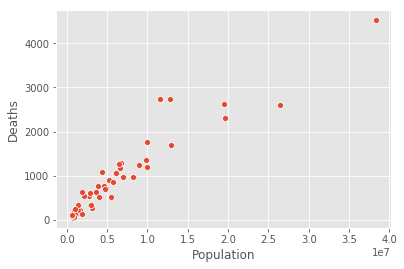

In [28]:
plt.style.use('ggplot')
sns.scatterplot(x=df_overdose['Population'],y=df_overdose['Deaths'])

As expected Population and Deaths are correlated. Let's see top 5 Opioid Death States per Capita.

In [31]:
df_overdose['Death Per Capita'] = df_overdose['Deaths']/df_overdose['Population']

In [70]:
df_overdose = df_overdose.sort_values(['Death Per Capita'])
df_overdose.head()

,State,Population,Deaths,Abbrev,Death Per Capita
33,North Dakota,723393.0,43.0,ND,0.000059
26,Nebraska,1868516.0,125.0,NE,0.000067
40,South Dakota,844877.0,63.0,SD,0.000075
14,Iowa,3090416.0,264.0,IA,0.000085
22,Minnesota,5420380.0,517.0,MN,0.000095


In [76]:
Statelist = list(df_overdose['Abbrev'])

Text(0.5, 1.0, 'Opioids Death Per Capita')

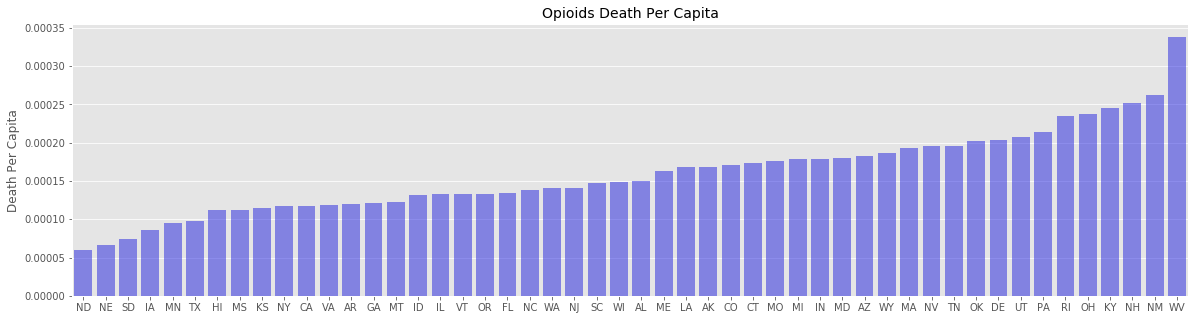

In [87]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(111)
sns.barplot(y=df_overdose['Death Per Capita'], x=Statelist, ax=ax1, color='b',alpha=0.5)
ax1.set_title("Opioids Death Per Capita",fontsize=14)

OH, KY, NH, NM, WV are the top 5 US states with high death/capita due to opioid overdoses.

In [88]:
df_opioids.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


In [89]:
df_prescriber.columns

Index(['NPI', 'Gender', 'State', 'Credentials', 'Specialty', 'ABILIFY',
       'ACETAMINOPHEN.CODEINE', 'ACYCLOVIR', 'ADVAIR.DISKUS', 'AGGRENOX',
       ...
       'VERAPAMIL.ER', 'VESICARE', 'VOLTAREN', 'VYTORIN', 'WARFARIN.SODIUM',
       'XARELTO', 'ZETIA', 'ZIPRASIDONE.HCL', 'ZOLPIDEM.TARTRATE',
       'Opioid.Prescriber'],
      dtype='object', length=256)

In [90]:
ops = list(re.sub(r'[-\s]','.',x) for x in df_opioids.values[:,0])

Lets now see how many of opioids are present in the main data set?

In [91]:
prescribed_ops = list(set(ops) & set(df_prescriber.columns))

In [92]:
prescribed_ops

['MORPHINE.SULFATE',
 'MORPHINE.SULFATE.ER',
 'FENTANYL',
 'TRAMADOL.HCL',
 'OXYCODONE.ACETAMINOPHEN',
 'OXYCODONE.HCL',
 'ACETAMINOPHEN.CODEINE',
 'HYDROCODONE.ACETAMINOPHEN',
 'HYDROMORPHONE.HCL',
 'OXYCONTIN',
 'METHADONE.HCL']

In [93]:
for i,drug in enumerate(prescribed_ops):
    print (i+1,drug)

1 MORPHINE.SULFATE
2 MORPHINE.SULFATE.ER
3 FENTANYL
4 TRAMADOL.HCL
5 OXYCODONE.ACETAMINOPHEN
6 OXYCODONE.HCL
7 ACETAMINOPHEN.CODEINE
8 HYDROCODONE.ACETAMINOPHEN
9 HYDROMORPHONE.HCL
10 OXYCONTIN
11 METHADONE.HCL


__There are only 11 opioids out of 250 drugs in the main data set.__

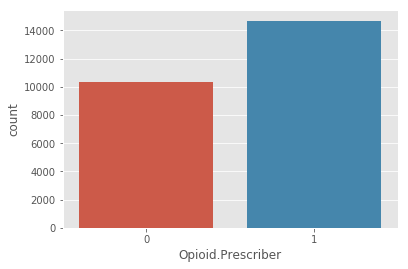

In [94]:
sns.countplot(df_prescriber['Opioid.Prescriber'])

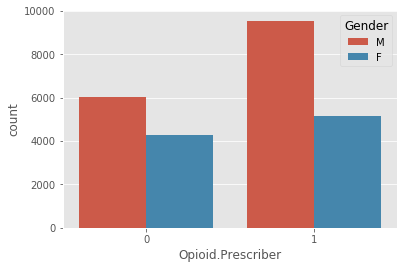

In [95]:
sns.countplot(df_prescriber['Opioid.Prescriber'], hue=df_prescriber['Gender'])

In [96]:
df_prescriber['Opioid.Prescriber'].value_counts()

1    14688
0    10312
Name: Opioid.Prescriber, dtype: int64

In [97]:
print (float(df_prescriber['Opioid.Prescriber'].sum())*100/df_prescriber.shape[0],"%")

58.752 %


__About 59% of the prescribers prescribed Opioids.__

__The rate of prescribing opioids is relatively high in male prescribers.__

In [98]:
df_prescriber['Number of Opioids Prescribed'] \
= df_prescriber.apply(lambda x: sum(x[prescribed_ops]), axis=1)

In [99]:
df_prescriber['Number of Total Prescriptions']\
=df_prescriber.apply(lambda x: sum(x.iloc[5:255]), axis=1)

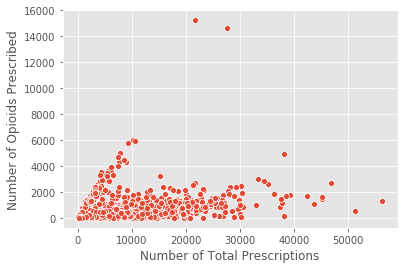

In [100]:
sns.scatterplot(x=df_prescriber['Number of Total Prescriptions'],y=df_prescriber['Number of Opioids Prescribed'])

Number of Total Prescriptions vs Number of Opioids Prescribed plot shows that they are not much correlated (naively). But Machine learning technique can be used to extract some useful information. 

In [105]:
df_prescriber[df_prescriber['Opioid.Prescriber']==1]['Specialty'].value_counts().head(25)

Family Practice                                                   2635
Internal Medicine                                                 2426
Nurse Practitioner                                                1350
Physician Assistant                                               1262
Dentist                                                           1058
Emergency Medicine                                                1045
Orthopedic Surgery                                                 567
General Surgery                                                    442
Urology                                                            259
Student in an Organized Health Care Education/Training Program     245
Podiatry                                                           224
Hematology/Oncology                                                200
Neurology                                                          196
General Practice                                                   186
Physic

Top 6 opioid prescirber categories are: Family Practice, Internal Medicine, Nurse Practitioner, Physician Assistant, Dentist and Emergency Medicine.